In [3]:
#Import neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.cluster as cluster
from sklearn.preprocessing import StandardScaler



In [4]:
#Load the dataset
data = pd.read_csv('customer_data_records.csv')

# Display the first few rows of the dataset
print(data.head())

   CustomerID  Annual Income (k$)  Spending Score (1-100)
0           1                 117                      20
1           2                 107                      59
2           3                  29                      36
3           4                 121                      19
4           5                  86                      90


In [6]:
#Extract relevant
x = data.iloc[:, [1, 2,]].values # Select columns 1 and 2 as 'Annual Income' and 'Spending Score' for all rows

In [7]:
#Feature scaling - it is important to scale the features before clustering
scaler = StandardScaler() # Create a StandardScaler object
X_scaled = scaler.fit_transform(x) # Standardize the features to have mean=0 and variancve=1

In [8]:
#Determine the optimal number of clusters using the Elbow method
wcss = [] # List to store the within-cluster sum of squares
for i in range(1, 11): # Testing for 1 to 10 clusters
    kmeans = cluster.KMeans(n_clusters=i, random_state=42) # Create KMeans object with i clusters
    kmeans.fit(X_scaled) # Fit the model to the scaled data
    wcss.append(kmeans.inertia_) # Append the inertia (WCSS) to the list

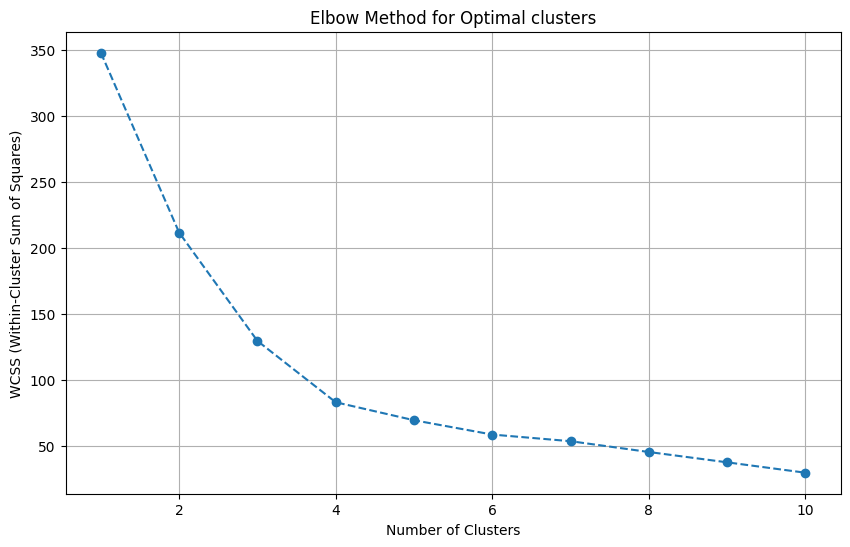

In [9]:
#plot the Elbow method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.grid(True)
plt.show()

In [11]:
#Based on the elbow method, let's assume the optimal number of clusters is 5
optimal_clusters = 5 #let say we determined 5 clusters from Elbow method

#Apply K-Means clustering witrh the optimal number of clusters
kmeans = cluster.KMeans(n_clusters=optimal_clusters, random_state=42) # create KMeans object with optimal clusters
kmeans.fit(X_scaled) #Fit the model to the scaled data

,n_clusters,5
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [12]:
#Apply the K-means with the optimalnumber of clusters
kmeans = cluster.KMeans(n_clusters=optimal_clusters, random_state=42) #Create KMeans object with optimal clusters
y_kmeans = kmeans.fit_predict(X_scaled) #Predict the cluster levels for the scaled data

In [ ]:
# Add cluster labels to the original data
data['cluster'] = y_kmeans # Creates new column 'Cluster' in the data DataFrame

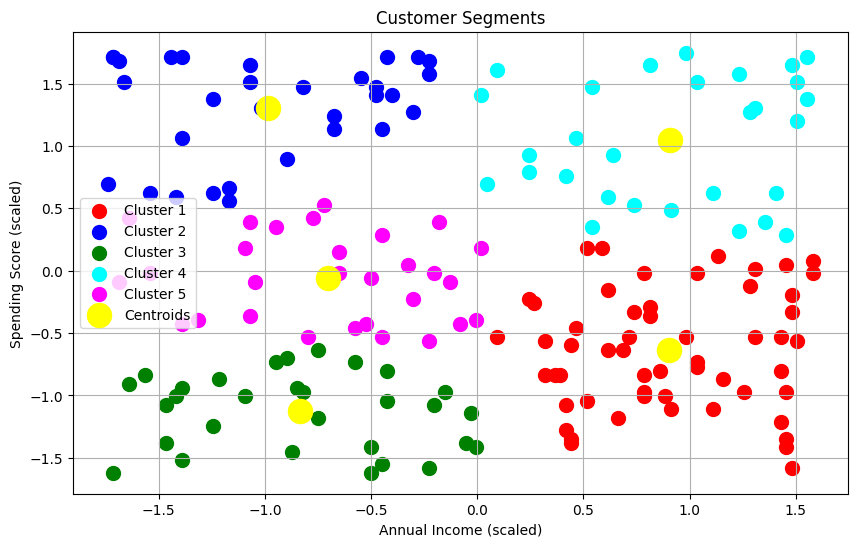

In [ ]:
# Visualise the clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[y_kmeans == 0, 0], X_scaled[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X_scaled[y_kmeans == 1, 0], X_scaled[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X_scaled[y_kmeans == 2, 0], X_scaled[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X_scaled[y_kmeans == 3, 0], X_scaled[y_kmeans == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(X_scaled[y_kmeans == 4, 0], X_scaled[y_kmeans == 4, 1], s=100, c='magenta', label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Customer Segments')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.legend()
plt.grid(True)
plt.show()
